### Exercise-9
### Python Program for Artificial Neural Network (Manual).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)
import tensorflow 
tensorflow.random.set_seed(1)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn import metrics

# Functions for the ANN Model
def initialize_parameters(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={
            "W1":W1,
            "b1":b1,
            "W2":W2,
            "b2":b2}
    return parameters

def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=10
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    logprobs=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost=-(1/m)*np.sum(logprobs)
    return cost

def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    cache={
            "Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    return A2,cache

def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply((np.dot(W2.T,dZ2)),(1-np.power(A1,2)))
    dW1 = 1/(m)*np.dot(dZ1,X.T)
    db1 = 1/(m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate = 0.1):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-((learning_rate)*dW1)
    b1 = b1-((learning_rate)*db1)
    W2 = W2-((learning_rate)*dW2)
    b2 = b2-((learning_rate)*db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)*1
    return predictions

# The ANN Model
def nn_model(X, Y, n_h, num_iterations = 128, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
         A2, cache = forward_propagation(X,parameters)
         cost = compute_cost(A2,Y,parameters)
         grads = backward_propagation(parameters,cache,X,Y)
         parameters = update_parameters(parameters,grads,2) 
         if print_cost:
            print ("Epoch %i/%i : \t loss:%f" %(i+1,num_iterations, cost))
    return parameters

# Input: Dataset 
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding Categorical Values
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])],
                       remainder = 'passthrough')
X = ct.fit_transform(X)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Preprocessing Data
X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T
shape_X=X_train.shape
shape_Y=y_train.shape
m=X_train.shape[1]

# Train the model using the training sets
(n_x,n_h,n_y)=layer_sizes(X_train,y_train)
parameters=initialize_parameters(n_x,n_h,n_y)
A2,cache=forward_propagation(X_train,parameters)
grads = backward_propagation(parameters, cache, X_train, y_train)
parameters = update_parameters(parameters, grads)
parameters = nn_model(X_train, y_train, 10, num_iterations=128,print_cost=True)

# Make predictions using the testing set
y_pred = predict(parameters, X_test)

# Calculating the Confusion Matrix and Accuracy of the Model
cm = metrics.confusion_matrix(y_test.T, y_pred.T)
accuracy = 100*(cm[0][0]+cm[1][1])/X_test.shape[1]

Epoch 1/128 : 	 loss:0.693171
Epoch 2/128 : 	 loss:0.559884
Epoch 3/128 : 	 loss:0.523445
Epoch 4/128 : 	 loss:0.511414
Epoch 5/128 : 	 loss:0.506760
Epoch 6/128 : 	 loss:0.504578
Epoch 7/128 : 	 loss:0.503120
Epoch 8/128 : 	 loss:0.501564
Epoch 9/128 : 	 loss:0.499329
Epoch 10/128 : 	 loss:0.495829
Epoch 11/128 : 	 loss:0.490441
Epoch 12/128 : 	 loss:0.482719
Epoch 13/128 : 	 loss:0.472824
Epoch 14/128 : 	 loss:0.461878
Epoch 15/128 : 	 loss:0.451617
Epoch 16/128 : 	 loss:0.443372
Epoch 17/128 : 	 loss:0.437473
Epoch 18/128 : 	 loss:0.433560
Epoch 19/128 : 	 loss:0.431093
Epoch 20/128 : 	 loss:0.429586
Epoch 21/128 : 	 loss:0.428669
Epoch 22/128 : 	 loss:0.428092
Epoch 23/128 : 	 loss:0.427699
Epoch 24/128 : 	 loss:0.427397
Epoch 25/128 : 	 loss:0.427135
Epoch 26/128 : 	 loss:0.426880
Epoch 27/128 : 	 loss:0.426615
Epoch 28/128 : 	 loss:0.426330
Epoch 29/128 : 	 loss:0.426018
Epoch 30/128 : 	 loss:0.425676
Epoch 31/128 : 	 loss:0.425302
Epoch 32/128 : 	 loss:0.424895
Epoch 33/128 : 	 

### Exercise-9
### Python Program for Artificial Neural Network (Keras).

In [9]:
# Input: Dataset 
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding Categorical Values
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])],
                       remainder = 'passthrough')
X = ct.fit_transform(X)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The ANN Model
def deep_model():
    classifier = Sequential()
    classifier.add(Dense(units=12, kernel_initializer='uniform',
                         activation='relu', input_dim=12))
    classifier.add(Dense(units=12, kernel_initializer='uniform',
                         activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', 
                         activation='sigmoid'))
    classifier.compile(optimizer='rmsprop', loss='binary_crossentropy',
                       metrics=['accuracy'])
    return classifier

# Create ANN object
classifier = deep_model()

# Train the model using the training sets
classifier.fit(X_train, y_train, batch_size=4, epochs=128)

# Make predictions using the testing set
y_pred1 = classifier.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

# Calculating the Confusion Matrix and Accuracy of the Model
cm1 = metrics.confusion_matrix(y_test, y_pred1)
accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1])

Epoch 1/128
2000/2000 [==============================] - 2s 559us/step - loss: 0.5045 - accuracy: 0.7907
Epoch 2/128
2000/2000 [==============================] - 1s 586us/step - loss: 0.4325 - accuracy: 0.8119
Epoch 3/128
2000/2000 [==============================] - 1s 551us/step - loss: 0.4033 - accuracy: 0.8341
Epoch 4/128
2000/2000 [==============================] - 1s 544us/step - loss: 0.4161 - accuracy: 0.8236
Epoch 5/128
2000/2000 [==============================] - 1s 532us/step - loss: 0.4012 - accuracy: 0.8389
Epoch 6/128
2000/2000 [==============================] - 1s 525us/step - loss: 0.4037 - accuracy: 0.8406
Epoch 7/128
2000/2000 [==============================] - 1s 525us/step - loss: 0.4066 - accuracy: 0.8385
Epoch 8/128
2000/2000 [==============================] - 1s 520us/step - loss: 0.4120 - accuracy: 0.8358
Epoch 9/128
2000/2000 [==============================] - 1s 525us/step - loss: 0.3940 - accuracy: 0.8360
Epoch 10/128
2000/2000 [==============================]

### Exercise-9 
### Output and Comparison of Both Methods.



ACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (MANUAL)

The Confusion Matrix for the ANN Model



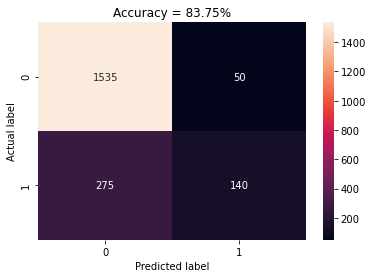


Prediction Mean = 0.095

__________________________________________________________



ACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (KERAS)

The Confusion Matrix for the ANN Model



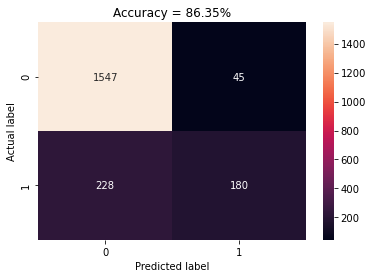


Prediction Mean = 0.1125


In [13]:
# For Manual Method
# Output: The Confusion Matrix, Accuracy and the Prediction Mean
print("\n\nACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (MANUAL)")
print("\nThe Confusion Matrix for the ANN Model\n")
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Accuracy = {0:.2f}%'.format(accuracy))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nPrediction Mean = " + str(np.mean(y_pred)))
print("\n__________________________________________________________\n")

# For Keras Method
# Output: The Confusion Matrix, Accuracy and the Prediction Mean
print("\n\nACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (KERAS)")
print("\nThe Confusion Matrix for the ANN Model\n")
sns.heatmap(cm1, annot=True, fmt='g')
plt.title('Accuracy = {0:.2f}%'.format(accuracy1*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nPrediction Mean = " + str(np.mean(y_pred1)))

##### On comparison, we can see that ANN Model using own code is less accurate as compared to ANN Model with Keras. But, both models can be considered as a good fit for prediction of unknown values. 